# Caracterização de eletrofáceis por meio de inteligência artificial com abordagem supervisionada
## Boxplots das propriedades de litologias nos diferentes membros

- **Nome do Arquivo**: boxplots_litologia_membro.ipynb
- **Autor**: Rafael Takeguma Goto
- **Versão**: 1.0
- **Data de Criação**: 08/07/2024
- **Data de Modificação**: 08/07/2024

### Descrição: 
Este notebook contém o a etapa do trabalho referente à criação de boxplots das propriedades (curvas) das litologias em diferentes membros nos poços individuais.

### Leitura do conjunto de dados

O conjunto de dados é constituído por arquivos csv gerados a partir da fusão da extração dos arquivos dlis com os arquivos agp de cada poço, seguida da aplicação dos filtros de constantes, nulos e perfis (DCAL e DRHO).

In [1]:
import pandas as pd

path_pocos_pre_transicao = 'Dados-filtrados-concatenados\pocos_pre_transicao.csv'

dados_concatenados_leitura = pd.read_csv(path_pocos_pre_transicao)

dados_concatenados = pd.DataFrame(dados_concatenados_leitura)

### Renomeação de abreviaturas
As abreviaturas das unidades formação e membro devem ser renomeadas conforme especificado na [planilha](https://docs.google.com/spreadsheets/d/1PrwJxLCmAqMflmdiupWNOWd1XU3UXX0y/edit?usp=sharing&ouid=105655038426172501016&rtpof=true&sd=true) que Vandelli disponibilizou.

In [2]:
# renomeia abreviaturas das unidades formação
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'COTING', 'UnidadeF'] = 'COT'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'SERRAR', 'UnidadeF'] = 'SER'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'BATING', 'UnidadeF'] = 'BAT'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'ARACAR', 'UnidadeF'] = 'ARA'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'PENEDO', 'UnidadeF'] = 'PDO'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'RIACHU', 'UnidadeF'] = 'RIA'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'BANANE', 'UnidadeF'] = 'BAN'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'MURIBE', 'UnidadeF'] = 'MUR'
dados_concatenados.loc[dados_concatenados['UnidadeF'] == 'EMBASA', 'UnidadeF'] = 'EMB'

# renomeia abreviaturas das unidades membro
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'SAPUCA', 'UnidadeM'] = 'SAP'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'SERRAR', 'UnidadeM'] = 'SER'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'ARACAR', 'UnidadeM'] = 'ARA'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'BATING', 'UnidadeM'] = 'BAT'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'PENEDO', 'UnidadeM'] = 'PDO'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'BANANE', 'UnidadeM'] = 'BAN'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'EMBASA', 'UnidadeM'] = 'EMB'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'TAQUAR', 'UnidadeM'] = 'TQR'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'MARUIM', 'UnidadeM'] = 'MAR'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'ANGICO', 'UnidadeM'] = 'ANG'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'OITEIR', 'UnidadeM'] = 'OIT'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'IBURA', 'UnidadeM'] = 'IBU'
dados_concatenados.loc[dados_concatenados['UnidadeM'] == 'CARMOP', 'UnidadeM'] = 'CPS'

### Separar os dados concatenados em 11 dataframes

In [3]:
# Identificar os nomes únicos dos poços
nomes_pocos = dados_concatenados['Poço'].unique()

# Criar o dicionário de dataframes
dados = {poco: dados_concatenados[dados_concatenados['Poço'] == poco].reset_index(drop=True) for poco in nomes_pocos}

In [4]:
dados.keys()

dict_keys(['1-BRSA-459-SE', '1-BRSA-551-SE', '1-BRSA-574-SE', '1-BRSA-595-SE', '1-BRSA-605-SE', '1-BRSA-643-SE', '1-BRSA-645-SE', '1-BRSA-659-SE', '1-BRSA-689-SE', '1-BRSA-696-SE', '1-BRSA-698-SE'])

### Teste 1
Primeiro teste da plotagem dos gráficos boxplot das propriedades das litologias em cada membro.
Possivelmente serão utilizados 4 loops for: 
- for litologia in litologias
- for propriedade in propriedades
- for membro in membros
- for poço in dados

Será necessário criar uma função que tome como parâmetro a litologia, a propriedade e a unidade Membro e retorne um gráfico com 11 boxplots da propriedade daquela litologia naquele membro para cada poço.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def cria_boxplots(dataframes, propriedade, litologia, unidade_membro):
    # Lista para armazenar os dados filtrados
    dados_filtrados = []
    nomes_pocos = []

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    # Iterar sobre cada poço e filtrar os dados com a litologia e o membro específico
    for poco, df in dataframes.items():
        filtered_df = df[(df['Litologia'] == litologia) & (df['UnidadeM'] == unidade_membro)]

        dados_filtrados.append(filtered_df[propriedade])
        
        nomes_pocos.append(poco)

    # Criar o plot
    ax.boxplot(dados_filtrados)
    
    # Adiciona rótulos para os eixos e um título
    ax.set_xlabel('Poços', fontweight='bold')
    ax.set_ylabel(propriedade, fontweight='bold')
    ax.set_title(f'Boxplots da propriedade {propriedade} para a litologia {litologia} na unidade {unidade_membro}', fontweight='bold')

    # Adiciona rótulos para os poços do eixo x
    ax.set_xticklabels([nome_poco for nome_poco in nomes_pocos], rotation=45)   

    plt.show()    

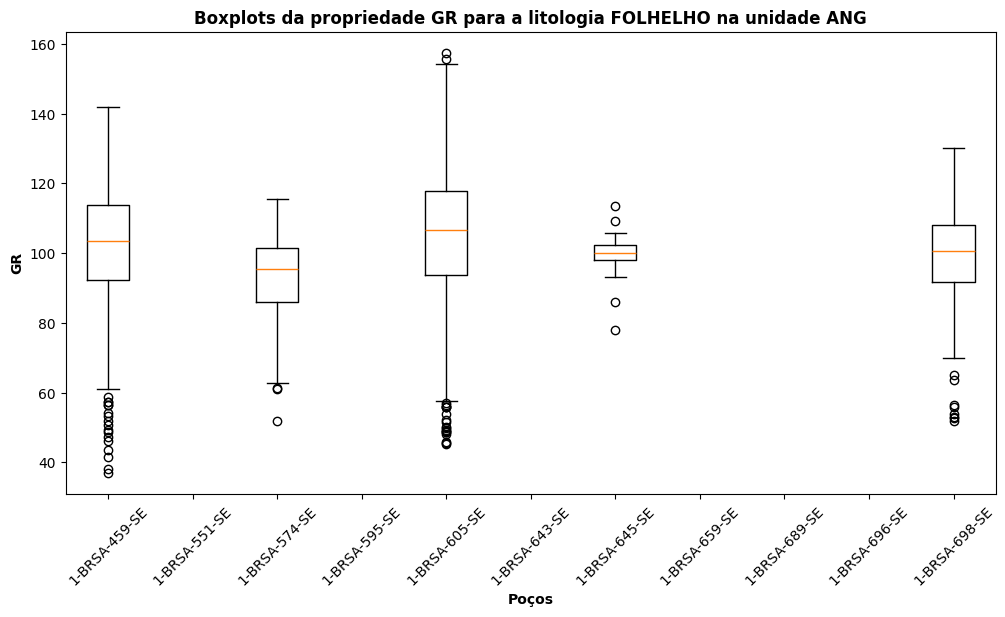

In [6]:
cria_boxplots(dados, 'GR', 'FOLHELHO', 'ANG')